# 5. Set Theory Clauses

These clauses are generally used to combine two `SELECT` statements across two tables. The core difference with joins is that clauses here only bind fields on top of one another in the two tables instead of combining fields/columns as well.

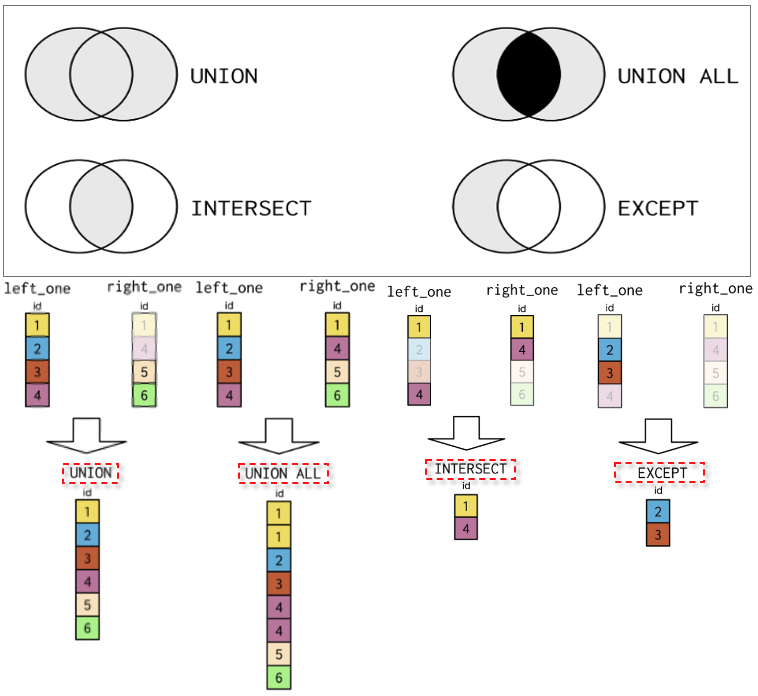

*source: datacamp*

## 5.1 The `UNION` Operator

The `UNION` operator is used to combine the result-set of two or more `SELECT` statements.

- Every `SELECT` statement within `UNION` must have the same number of columns.
- The columns must also have similar data types.
- The columns in every `SELECT` statement must also be in the same order.


```sql
-- Syntax
SELECT column_name(s) FROM table1
UNION
SELECT column_name(s) FROM table2;
```
We can use `UNION` to combine two tables with similar schemas into one containing all of the fields the first one.

```sql
select *
from economies2010
union
select * 
from economies2015
order by code, year; 
```

`UNION` be used to determine all occurrences of a field across multiple tables.

```sql
-- Determine all (non-duplicated) country codes in either the cities or the currencies table.
select country_code 
from cities 
union
select code as country_code
from currencies
order by country_code;
```

Duplicates were removed from the previous two exercises by using `UNION. To include duplicates, you can use `UNION ALL`.

```sql
-- Note, number and type of columns match across tables
select  code, year
from economies
union all
select country_code, year
from populations
order by code, year;
```

> 💡 `UNION` vs `JOIN`: Unions only bind fields on top of one another in the two tables whereas Joins extend the fields/schema in a resulting query.


## 5.2 The `INTERSECT` operator

The `INTERSECT` clause returns only those rows which will be common to both of the `SELECT` statement fields. In other words, `INTERSECT` will only return records that both tables have in common.

```sql
-- Syntax
SELECT column_name(s) FROM table1
WHERE condition
INTERSECT
SELECT column_name(s) FROM table2
WHERE condition
```

As an example, we can find records common for country code and year for the economies and populations tables.
```sql
select code, year from economies
intersect
select country_code, year from populations
order by code, year;
```


## 5.3 `EXCEPT` operator

The except clause is used to return only the records that appear in the left table but do not appear in the right table.

```sql
-- Syntax
SELECT column_name(s) FROM table1
WHERE condition
INTERSECT
SELECT column_name(s) FROM table2
WHERE condition
```

A use case can be, in a table of cities and a table of countries with a field that lists the capital city of the respective country, get the names of cities that are not capitals.

```sql
select name from cities
except
select capital from countries
order by name;
```

## 5.4 Semi and anti Joins

These clauses are useful tools in filtering one table's records on the records of another table.

- The `semi-join` matches records by key field in the right table with those in the left. It then picks out only the rows in the left table that match that condition. 
- The `anti-join` picks out those columns in the left table that do not match the condition on the right table. 

Semi-joins and anti-joins don't have the same built-in SQL syntax that `INNER JOIN` and `LEFT JOIN` have.

```sql
-- Semi join syntax
SELECT s.id
FROM  students s
WHERE EXISTS (SELECT 1 FROM grades g
              WHERE g.student_id = s.id)
```


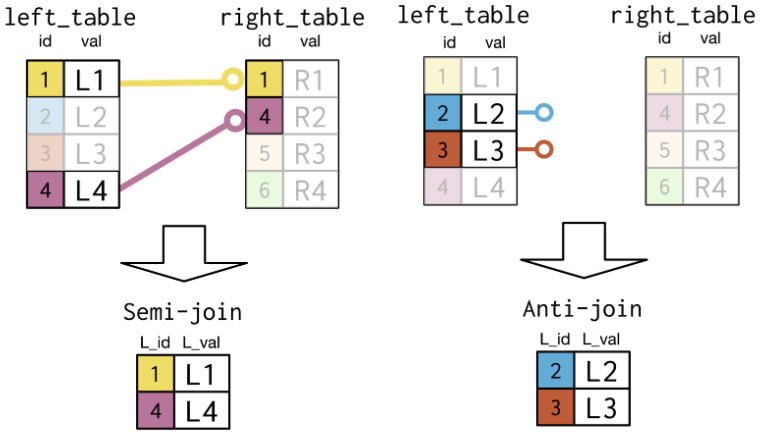

*source: datacamp*

```sql
-- 1. Countries in the Middle East region
select code from countries
where region like 'Middle East';


-- 2. Distinct language names
select DISTINCT name from languages
order by name;

-- 1 & 2. Distinct languages from the Middle East region
select DISTINCT name from languages
where code in (select code from countries
              where region like 'Middle East')
order by name;
```